In [1]:
import os
import seaborn as sns
import glob
import pandas as pd
import numpy as np
from seaborn import histplot, kdeplot
from matplotlib import pyplot as plt

# Latex
from matplotlib import rcParams
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

scores_path = 'similarity_scores/'
plot_path = 'plots/'

if not os.path.exists(plot_path):
    os.mkdir(plot_path)

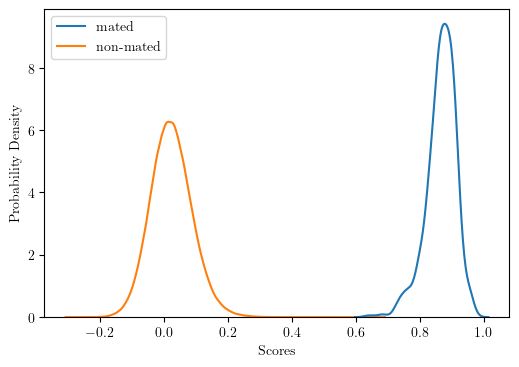

In [7]:
# Baseline (Real images)
legends = []
real_images_scores = pd.DataFrame()
score_files = [os.path.basename(file) for file in glob.glob(scores_path + '*.npy')]

for file in score_files:
    file_path = os.path.join(scores_path, file)
    if 'real' and not 'synthetic' in file:
        if 'non-mated' in file:
            comparison = 'non-mated'
            legends.append(comparison)
        else:
            comparison = 'mated'
            legends.append(comparison)
        scores = np.load(file_path)
        pd_scores = pd.DataFrame({'Comparison':comparison, "Score":scores})
        real_images_scores = pd.concat([real_images_scores, pd_scores], ignore_index=True)
real_images_scores=real_images_scores.reset_index(drop=True)        
#plt.figure(figsize=(6.4,4.8))
plt.figure(figsize=(6,4))
plot = kdeplot(data=real_images_scores, x="Score", hue='Comparison', common_norm=False)
plot.legend_.set_title(None)
plot.set_ylabel(r'Probability Density')
plot.set_xlabel(r'Scores')
plt.show()
plot.get_figure().savefig(plot_path + 'real_images.png', bbox_inches='tight')
plot.get_figure().savefig(plot_path + 'real_images.pgf', bbox_inches='tight')
plot.get_figure().savefig(plot_path + 'real_images.pdf', bbox_inches='tight')

cap


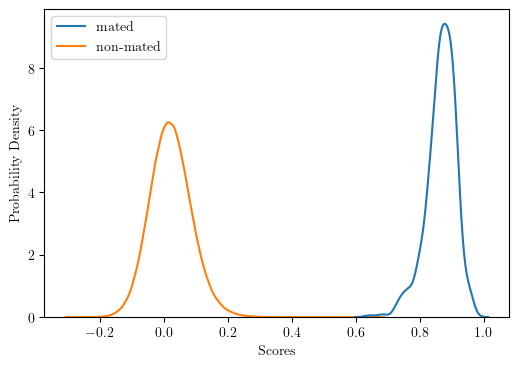

glass


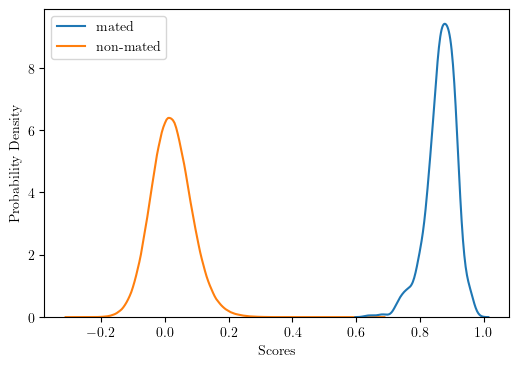

glass_cap


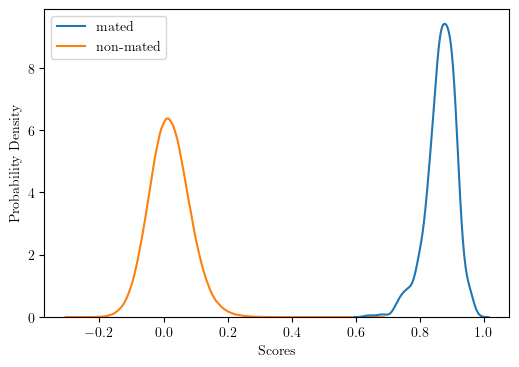

mask


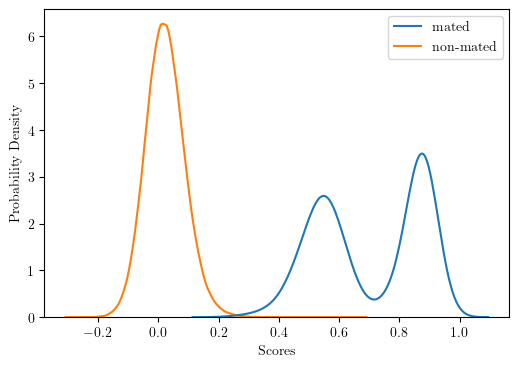

mask_cap


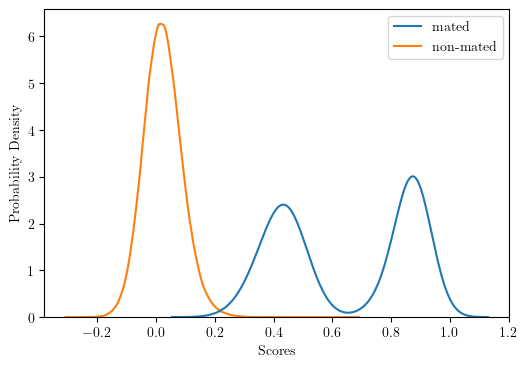

mask_glass


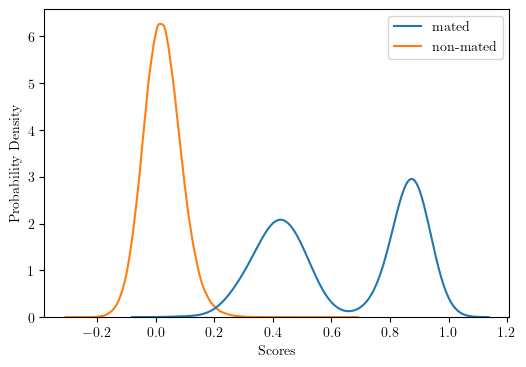

mask_glass_cap


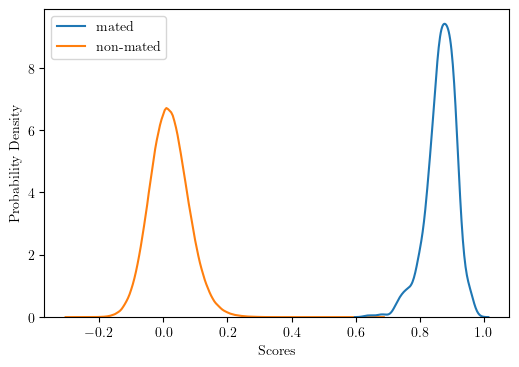

mask_sunglass


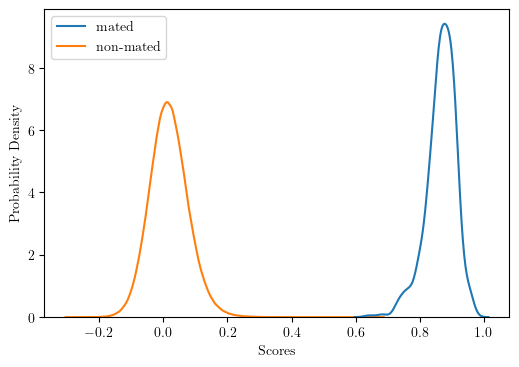

mask_sunglass_cap


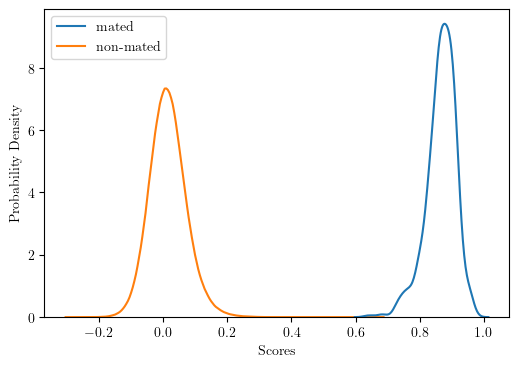

sunglass


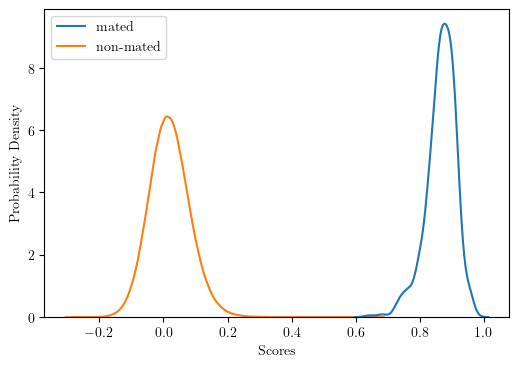

sunglass_cap


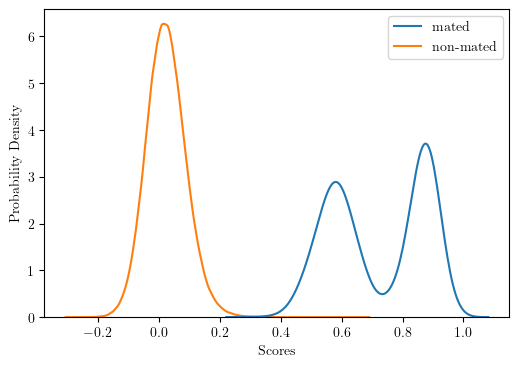

In [8]:
# Real images versus synthetic images with occlusions
score_files = [os.path.basename(file) for file in glob.glob(scores_path + '*.npy')]
filtered_score_files = []
occlusions = []
for file in score_files:
    if 'real' and 'synthetic' in file:
        filtered_score_files.append(file)
        occlusions.append('_'.join(os.path.splitext(file)[0].split('_')[5:]))
occlusions = [*set(occlusions)] # remove duplicates
occlusions.sort()

for occlusion in occlusions:
    legends = []
    real_vs_synthetic_scores = pd.DataFrame()
    for file in [os.path.basename(file) for file in glob.glob(scores_path + '*mated_' + occlusion + '.npy')]:
        file_path = os.path.join(scores_path, file)
        if 'non-mated' in file:
            comparison = 'non-mated'
            legends.append(comparison)
        else:
            comparison = 'mated'
            legends.append(comparison)
        scores = np.load(file_path)
        pd_scores = pd.DataFrame({'Comparison':comparison, "Score":scores})
        real_vs_synthetic_scores = pd.concat([real_images_scores, pd_scores], ignore_index=True)
    
    real_vs_synthetic_scores=real_vs_synthetic_scores.reset_index(drop=True)        
    #plt.figure(figsize=(6.4,4.8))
    plt.figure(figsize=(6,4))
    print(occlusion)
    plot = kdeplot(data=real_vs_synthetic_scores, x="Score", hue='Comparison', common_norm=False)
    plot.legend_.set_title(None)
    plot.set_ylabel(r'Probability Density')
    plot.set_xlabel(r'Scores')
    plt.show()
    plot.get_figure().savefig(plot_path + occlusion + '.png', bbox_inches='tight')
    plot.get_figure().savefig(plot_path + occlusion + '.pgf', bbox_inches='tight')
    plot.get_figure().savefig(plot_path + occlusion + '.pdf', bbox_inches='tight')

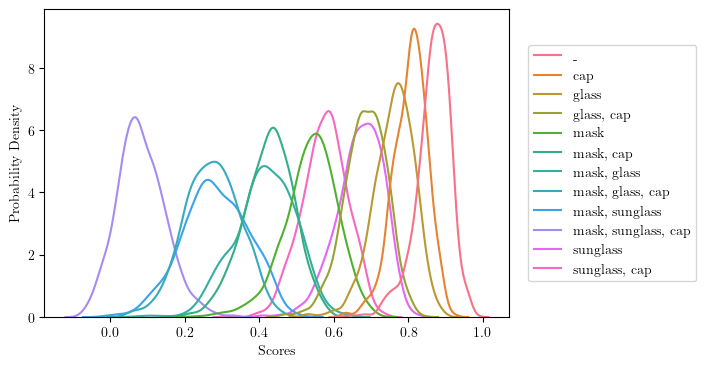

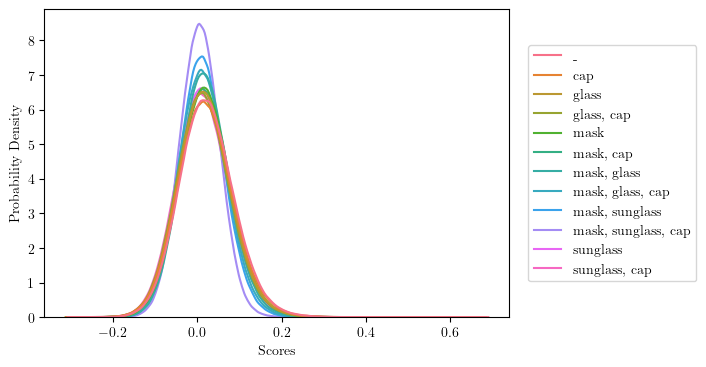

In [13]:
# Real images versus synthetic images with occlusions
score_files = [os.path.basename(file) for file in glob.glob(scores_path + '*.npy')]
mated_score_files = []
non_mated_score_files = [] 

for file in score_files:
    if 'non-mated' in file:
        non_mated_score_files.append(file)
    else:
        mated_score_files.append(file)

mated_score_files.sort()
non_mated_score_files.sort()

        
# mated
legends = []
mated_scores = pd.DataFrame()
for file in mated_score_files:
    file_path = os.path.join(scores_path, file)
    if 'real' and not 'synthetic' in file:
        occlusion = '-'
        legends.append(occlusion)
    else:
        occlusion = ', '.join(os.path.splitext(file)[0].split('_')[5:])
        legends.append(occlusion)
        
    scores = np.load(file_path)
    pd_scores = pd.DataFrame({'Occlusion':occlusion, "Score":scores})
    mated_scores = pd.concat([mated_scores, pd_scores], ignore_index=True)
    
mated_scores = mated_scores.reset_index(drop=True)

#plt.figure(figsize=(6.4,4.8))
plt.figure(figsize=(6,4))
plot = kdeplot(data=mated_scores, x="Score", hue='Occlusion', common_norm=False)
lgd = sns.move_legend(plot, loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plot.legend_.set_title(None)
plot.set_ylabel(r'Probability Density')
plot.set_xlabel(r'Scores')
plt.show()
plot.get_figure().savefig(plot_path + 'mated.png', bbox_extra_artists=(lgd), bbox_inches='tight')
plot.get_figure().savefig(plot_path + 'mated.pgf', bbox_extra_artists=(lgd), bbox_inches='tight')
plot.get_figure().savefig(plot_path + 'mated.pdf', bbox_extra_artists=(lgd), bbox_inches='tight')

# non-mated
legends = []
non_mated_scores = pd.DataFrame()
for file in non_mated_score_files:
    file_path = os.path.join(scores_path, file)
    if 'real' and not 'synthetic' in file:
        occlusion = '-'
        legends.append(occlusion)
    else:
        occlusion = ', '.join(os.path.splitext(file)[0].split('_')[5:])
        legends.append(occlusion)
        
    scores = np.load(file_path)
    pd_scores = pd.DataFrame({'Occlusion':occlusion, "Score":scores})
    non_mated_scores = pd.concat([non_mated_scores, pd_scores], ignore_index=True)
    
non_mated_scores = non_mated_scores.reset_index(drop=True)

#plt.figure(figsize=(6.4,4.8))
plt.figure(figsize=(6,4))
plot = kdeplot(data=non_mated_scores, x="Score", hue='Occlusion', common_norm=False)
lgd = sns.move_legend(plot, loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plot.legend_.set_title(None)
plot.set_ylabel(r'Probability Density')
plot.set_xlabel(r'Scores')
plt.show()
plot.get_figure().savefig(plot_path + 'non-mated.png', bbox_extra_artists=(lgd), bbox_inches='tight')
plot.get_figure().savefig(plot_path + 'non-mated.pgf', bbox_extra_artists=(lgd), bbox_inches='tight')
plot.get_figure().savefig(plot_path + 'non-mated.pdf', bbox_extra_artists=(lgd), bbox_inches='tight')